# MC simulation example

In class we saw the following example: the maximum impact pressure of ocean waves on coastal structures may be determined by $p_{m} = C U^2$ where $C=185$ is a constant and $U$ is the random horizontal velocity of the advancing wave, with a mean of 4.5 fps and a coefficient of variation of 20\%.

In this problem, the input RV is $U$, and the output QoI is $p_m$, and the nonlinear propagation function is $p_m=h(U)=185 U^2$. For this coding exercise, let's further assume that $U$ is Gaussian:
$$ U \sim N(4.5, (0.2 \times 4.5)^2) = N(4.5, 0.9^2) $$

Question: compare distribution and moments of $p_m$ using linearization vs. MC sampling

Part 1. Linearization

In class we saw that we can approximate the moments of QoI Y through a first-order linearization scheme as:
$$ E[p_m] = 3746.25 $$
$$ Var(p_m) = 1498.5 ^ 2 = 2245502.25 $$

In addition, under a first-order linearization assumption, $p_m$ will also be Gaussian (since we approximate the nonlinear function with a linear approximation, which preserves Gaussianity). Thus we can approximate the density of the output QoI as:
$$ p_m \sim N(3746.25, 1498.5 ^ 2) $$
Let's plot it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

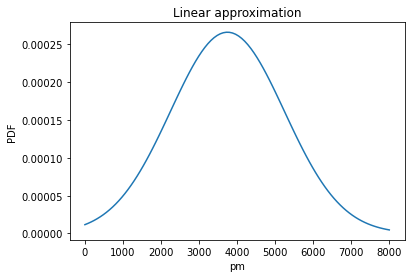

In [2]:
approx_linearization = norm(loc=3746.25, scale=1498.5)   # approx of p_m as a Gaussian RV

values_x = np.linspace(0, 8000, 100)   
values_pdf_at_x = approx_linearization.pdf(values_x)    

fig, ax = plt.subplots()
ax.plot(values_x, values_pdf_at_x)
ax.set_xlabel('pm')
ax.set_ylabel('PDF')
ax.set_title('Linear approximation')
plt.show()

Let's use this approximation to compute $P(p_m \leq 2000)=F_{p_m}(2000)$

In [3]:
proba = approx_linearization.cdf(2000)
print(proba)

0.12194231568486269


### Part 2. MC simulation

To perform MC simulation, you first sample from the input RV, then propagate all the samples through the nonlinear equation, then compute moments of the output RV via the transformed samples. 

First, let's write a function which does that (note: it's not the most efficient way to code this...)

In [4]:
def do_MC_simulation(N):
    all_output_samples = []
    for i in range(N):
        # sample one realization from the input U
        u_sample = norm(loc=4.5, scale=0.9).rvs()
        # transform it through the nonlinear equation h(u)=185 u^2
        output_sample = 185 * u_sample ** 2
        # save it 
        all_output_samples.append(output_sample)
    # return the output samples
    return all_output_samples

In [5]:
# Try to run the above for N=10 and look at the result
all_output_samples_test = do_MC_simulation(N=10)
print(all_output_samples_test)

[3386.9703211782953, 4604.548769088098, 5704.7339147602825, 4190.171657406733, 3349.8902251432696, 5410.7912930773255, 1421.4370090060477, 4747.60796948315, 3865.517335193575, 8384.914465752327]


3896.7840778510554


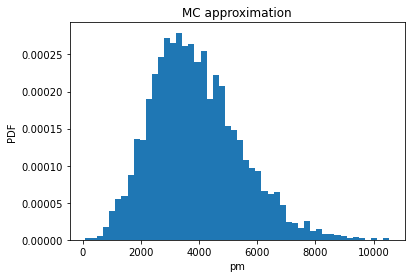

In [6]:
# To obtain better estimates of the output, you need to run for a larger number of samples, say 5000
mc_outputs = do_MC_simulation(N=5000)

# the estimate of E[p_m] provided by the MC simulation is the sample mean of the output samples
mean_MC = np.mean(mc_outputs)
print(mean_MC)

# Let's plot a histogram to see an approximation of the PDF of the output pm
fig, ax = plt.subplots()
ax.hist(mc_outputs, bins=50, density=True)   # set density=True so that the histogram integrates to 1 like a PDF
ax.set_xlabel('pm')
ax.set_ylabel('PDF')
ax.set_title('MC approximation')
plt.show()

Comment: you observe values that are similar but not exactly the same as for linearization. Also, the histogram looks a bit skewed to the right, while linearization approximates the output as a Gaussian which is symmetric. Using sampling accuracy theory seen in class, you should be able to compute the standard error on the mean estimate above.

Let's plot both approximations on the same plot to better compare them.

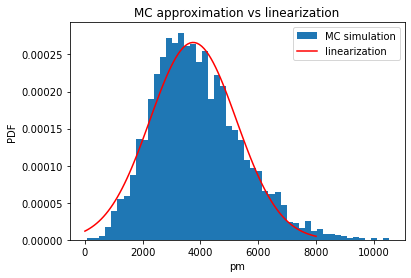

In [7]:
fig, ax = plt.subplots()
ax.hist(mc_outputs, bins=50, density=True, label='MC simulation')   # set density=True so that the histogram integrates to 1 like a PDF
ax.plot(values_x, values_pdf_at_x, color='red', label='linearization')    # same as in first plot
ax.set_xlabel('pm')
ax.set_ylabel('PDF')
ax.set_title('MC approximation vs linearization')
ax.legend()
plt.show()